In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Aug 22 07:54:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

To enable a high-RAM runtime, select the Runtime > "Change runtime type"
menu, and then select High-RAM in the Runtime shape dropdown. Then, 
re-execute this cell.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/Projects/GSoC 2021/tutorials'
!git clone https://github.com/eraraya-ricardo/qcnn-hep.git

In [4]:
%cd '/content/drive/My Drive/Projects/GSoC 2021/tutorials/qcnn-hep'
#!python -m pip install -r requirements.txt
!python setup.py

from IPython.display import clear_output
clear_output()

In [5]:
main_dir = '/content/drive/My Drive/Projects/GSoC 2021/tutorials'

import os
import sys
sys.path.append(main_dir)

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

import cirq
from cirq.contrib.svg import SVGCircuit

from qcnn_drc.data_reuploading import ReUploadingPQC
from qcnn_drc.quantum_convolution import QConv2D_DRC

# 1. Introduction

## 1.1 Data Re-uploading Classifier

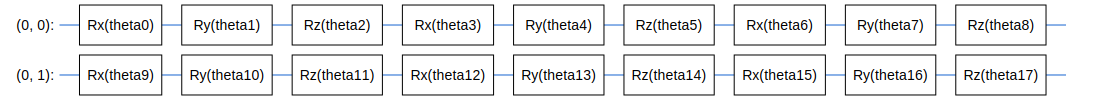

In [6]:
n_qubits = 2
qubits = cirq.GridQubit.rect(1, n_qubits)

Z_0 = cirq.PauliString(cirq.Z(qubits[0]))
I_0 = cirq.PauliString(cirq.I(qubits[0]))
Z_1 = cirq.PauliString(cirq.Z(qubits[1]))
I_1 = cirq.PauliString(cirq.I(qubits[1]))

gate_0 = 0.5*Z_0 + 0.5*I_0
gate_1 = -0.5*Z_1 + 0.5*I_1

observables = [gate_0, gate_1]

PQC = ReUploadingPQC(2, 1, 9, use_entanglement=False, use_terminal_entanglement=False, observables=observables)
SVGCircuit(PQC.circuit)

## 1.2 Quantum Convolution with Data Re-uploading PQC

# 2. Load MNIST Dataset

In [6]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale it by 255 so the pixel's value is in [0, 1]
x_train_flatten = x_train/255.0
x_test_flatten = x_test/255.0

# Separate the dataset into classes
x_train_0 = x_train_flatten[y_train == 0]
x_train_1 = x_train_flatten[y_train == 1]
x_train_2 = x_train_flatten[y_train == 2]
x_train_3 = x_train_flatten[y_train == 3]
x_train_4 = x_train_flatten[y_train == 4]
x_train_5 = x_train_flatten[y_train == 5]
x_train_6 = x_train_flatten[y_train == 6]
x_train_7 = x_train_flatten[y_train == 7]
x_train_8 = x_train_flatten[y_train == 8]
x_train_9 = x_train_flatten[y_train == 9]

x_train_list = [x_train_0, x_train_1, x_train_2, x_train_3, x_train_4, x_train_5, x_train_6, x_train_7, x_train_8, x_train_9]

print(x_train_0.shape)
print(x_train_1.shape)
print(x_train_2.shape)
print(x_train_3.shape)
print(x_train_4.shape)
print(x_train_5.shape)
print(x_train_6.shape)
print(x_train_7.shape)
print(x_train_8.shape)
print(x_train_9.shape)

x_test_0 = x_test_flatten[y_test == 0]
x_test_1 = x_test_flatten[y_test == 1]
x_test_2 = x_test_flatten[y_test == 2]
x_test_3 = x_test_flatten[y_test == 3]
x_test_4 = x_test_flatten[y_test == 4]
x_test_5 = x_test_flatten[y_test == 5]
x_test_6 = x_test_flatten[y_test == 6]
x_test_7 = x_test_flatten[y_test == 7]
x_test_8 = x_test_flatten[y_test == 8]
x_test_9 = x_test_flatten[y_test == 9]

x_test_list = [x_test_0, x_test_1, x_test_2, x_test_3, x_test_4, x_test_5, x_test_6, x_test_7, x_test_8, x_test_9]

print(x_test_0.shape)
print(x_test_1.shape)
print(x_test_2.shape)
print(x_test_3.shape)
print(x_test_4.shape)
print(x_test_5.shape)
print(x_test_6.shape)
print(x_test_7.shape)
print(x_test_8.shape)
print(x_test_9.shape)

(5923, 28, 28)
(6742, 28, 28)
(5958, 28, 28)
(6131, 28, 28)
(5842, 28, 28)
(5421, 28, 28)
(5918, 28, 28)
(6265, 28, 28)
(5851, 28, 28)
(5949, 28, 28)
(980, 28, 28)
(1135, 28, 28)
(1032, 28, 28)
(1010, 28, 28)
(982, 28, 28)
(892, 28, 28)
(958, 28, 28)
(1028, 28, 28)
(974, 28, 28)
(1009, 28, 28)


In [7]:
# Choose 2 classes (2 numbers)
class_set = [0, 1]

training_sample_per_class = 200  # number of training samples per class
X_train = np.concatenate((x_train_list[class_set[0]][:training_sample_per_class, :], x_train_list[class_set[1]][:training_sample_per_class, :]), axis=0)
Y_train = np.zeros((X_train.shape[0],), dtype=int)
Y_train[training_sample_per_class:] += 1

print("Train Set Shape:", X_train.shape, Y_train.shape)

testing_sample_per_class = 100  # number of testing samples per class
X_test = np.concatenate((x_test_list[class_set[0]][:testing_sample_per_class, :], x_test_list[class_set[1]][:testing_sample_per_class, :]), axis=0)
Y_test = np.zeros((X_test.shape[0],), dtype=int)
Y_test[testing_sample_per_class:] += 1

print("Test Set Shape:", X_test.shape, Y_test.shape)

Train Set Shape: (400, 28, 28) (400,)
Test Set Shape: (200, 28, 28) (200,)


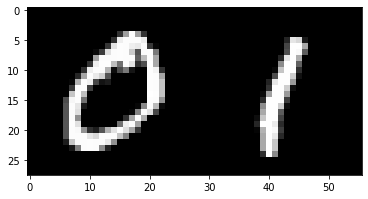

In [8]:
# Examples from train set
plt.imshow(np.concatenate((X_train[0], X_train[-1]), axis=1), cmap='gray')

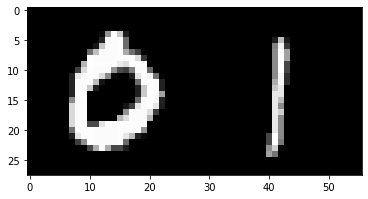

In [9]:
# Examples from test set
plt.imshow(np.concatenate((X_test[0], X_test[-1]), axis=1), cmap='gray')

# 3. Utils

## 3.1 Learning Rate Scheduler

In [10]:
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)


## 3.2 Callbacks

In [11]:
# Callback for saving model's weights, optimizer's states, and evaluation metrics
class CustomCallback(tf.keras.callbacks.Callback):

    def __init__(self, checkpoint_dir):
        super(CustomCallback, self).__init__()
        checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
        self.checkpoint = tf.train.Checkpoint(optimizer=opt_adam,
                                 model=model)

        try:
            self.best_metric_list = list(np.loadtxt(checkpoint_dir + '/history_best_metric_list.txt'))
        except:
            # acc, val acc, auc, val auc
            self.best_metric_list = [0, 0, 0, 0]

        def load_history(name):
            try:
                data = np.loadtxt(checkpoint_dir + '/history_' + name + '.txt')
                return list(data)
                
            except:
                return []

        self.accuracy_list = load_history('accuracy')
        self.val_accuracy_list = load_history('val_accuracy')
        self.auc_list = load_history('auc')
        self.val_auc_list = load_history('val_auc')
        self.loss_list = load_history('loss')
        self.val_loss_list = load_history('val_loss')

    def on_epoch_end(self, epoch, logs=None):
        self.checkpoint.save(file_prefix = checkpoint_prefix)
        print("Saved custom checkpoint for epoch {}.".format(epoch+1))

        def save_list_to_txt(metric, metric_list, name):
            metric_list += [metric]
            np.savetxt(checkpoint_dir + '/history_' + name + '.txt', np.array(metric_list))
            return metric_list

        self.accuracy_list = save_list_to_txt(logs["accuracy"], self.accuracy_list, 'accuracy')
        self.val_accuracy_list = save_list_to_txt(logs["val_accuracy"], self.val_accuracy_list, 'val_accuracy')
        self.auc_list = save_list_to_txt(logs["auc"], self.auc_list, 'auc')
        self.val_auc_list = save_list_to_txt(logs["val_auc"], self.val_auc_list, 'val_auc')
        self.loss_list = save_list_to_txt(logs["loss"], self.loss_list, 'loss')
        self.val_loss_list = save_list_to_txt(logs["val_loss"], self.val_loss_list, 'val_loss')
        
        print_space = 0

        if logs["accuracy"] > self.best_metric_list[0]:
            self.best_metric_list[0] = logs["accuracy"]
        
        if logs["val_accuracy"] > self.best_metric_list[1]:
            self.best_metric_list[1] = logs["val_accuracy"]

        if logs["auc"] > self.best_metric_list[2]:
            self.best_metric_list[2] = logs["auc"]

        if logs["val_auc"] > self.best_metric_list[3]:
            self.best_metric_list[3] = logs["val_auc"]

        np.savetxt(checkpoint_dir + '/history_best_metric_list.txt', np.array(self.best_metric_list))
        print("Best acc, val acc, auc, val auc:", self.best_metric_list)
        print('')

# Callbacks for saving weights only
def checkpoint_save_weights_only(checkpoint_dir):
    return tf.keras.callbacks.ModelCheckpoint(checkpoint_dir + '/{epoch:02d}epoch.h5',
                                              monitor='val_loss', verbose=1, save_best_only=False,
                                              save_weights_only=True, mode='auto', save_freq='epoch')

# 4. Quantum Classifier

## 4.1 Data Preprocessing

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train.reshape(-1, 28*28))
X_train_scaled = scaler.transform(X_train.reshape(-1, 28*28))
X_test_scaled = scaler.transform(X_test.reshape(-1, 28*28))

n_pca = 6
pca = PCA(n_components=n_pca)
pca.fit(X_train_scaled)

X_train_transform = pca.transform(X_train_scaled)
X_test_transform = pca.transform(X_test_scaled)

print(X_train_transform.shape, Y_train.shape)
print(X_test_transform.shape, Y_test.shape)

(400, 6) (400,)
(200, 6) (200,)


## 4.2 Example 1: A classifier consists of only one Data Re-uploading PQC (can be either single or multi-qubit circuit)

### 4.2.1 Single-Qubit Case (One Output)

#### Build the Model

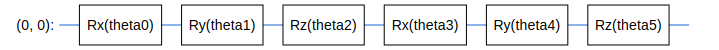

In [26]:
n_qubits = 1

# Construct the observable
qubits = cirq.GridQubit.rect(1, n_qubits)
Z = cirq.PauliString(cirq.Z(qubits[-1]))
I = cirq.PauliString(cirq.I(qubits[-1]))
observables = [-0.5*Z + 0.5*I]  # equivalent to |1⟩⟨1|

# Initialize the PQC
PQC = ReUploadingPQC(n_qubits, 1, n_pca, use_entanglement=True, use_terminal_entanglement=True, observables=observables)

# Construct the model
input_tensor = tf.keras.Input(shape=(n_pca,), dtype=tf.dtypes.float32, name='input')
quantum_classifier = PQC(input_tensor)
model = tf.keras.Model(inputs=[input_tensor], outputs=quantum_classifier)

# Optimizer
opt_adam = tf.keras.optimizers.Adam(lr=0.1)

model.compile(loss='mse',
              optimizer=opt_adam,
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

SVGCircuit(PQC.circuit)

In [27]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 6)]               0         
_________________________________________________________________
re-uploading_PQC (ReUploadin (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


#### Train the Model

Epoch 1/20
13/13 [==============================] - 1s 34ms/step - loss: 0.2580 - accuracy: 0.6215 - auc: 0.6569 - val_loss: 0.1709 - val_accuracy: 0.7750 - val_auc: 0.8523
Epoch 2/20
13/13 [==============================] - 0s 14ms/step - loss: 0.1725 - accuracy: 0.7459 - auc: 0.8726 - val_loss: 0.1489 - val_accuracy: 0.7900 - val_auc: 0.8946
Epoch 3/20
13/13 [==============================] - 0s 14ms/step - loss: 0.1203 - accuracy: 0.8397 - auc: 0.9383 - val_loss: 0.0261 - val_accuracy: 0.9900 - val_auc: 1.0000
Epoch 4/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0337 - accuracy: 0.9616 - auc: 0.9983 - val_loss: 0.0527 - val_accuracy: 0.9400 - val_auc: 1.0000
Epoch 5/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0377 - accuracy: 0.9555 - auc: 0.9943 - val_loss: 0.0260 - val_accuracy: 0.9800 - val_auc: 1.0000
Epoch 6/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0242 - accuracy: 0.9845 - auc: 0.9991 - val_loss: 0.0382 - v

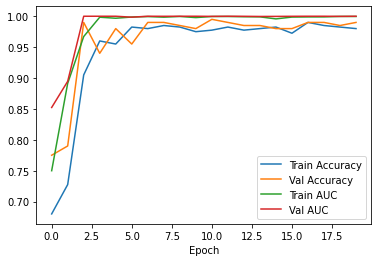

In [24]:
import time

last_epoch = 0

H = model.fit(X_train_transform, Y_train, initial_epoch=last_epoch,
              batch_size=32,
              epochs=20,
              validation_data=(X_test_transform, Y_test),
              shuffle=True)

print("Best Train Accuracy:", max(H.history['accuracy']))
print("Best Val Accuracy:", max(H.history['val_accuracy']))
print("Best Train AUC:", max(H.history['auc']))
print("Best Val AUC", max(H.history['val_auc']))

plt.plot(H.history['accuracy'], label='Train Accuracy')
plt.plot(H.history['val_accuracy'], label='Val Accuracy')
plt.plot(H.history['auc'], label='Train AUC')
plt.plot(H.history['val_auc'], label='Val AUC')

plt.xlabel('Epoch')

plt.legend()
plt.show()


### 4.2.2 Multi-Qubit Case (One Output)

#### Build the Model

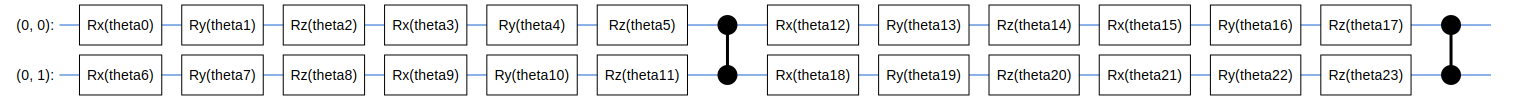

In [44]:
n_qubits = 2

# Construct the observable
qubits = cirq.GridQubit.rect(1, n_qubits)
Z = cirq.PauliString(cirq.Z(qubits[-1]))
I = cirq.PauliString(cirq.I(qubits[-1]))
observables = [-0.5*Z + 0.5*I]  # equivalent to |1⟩⟨1| on the second qubit

# Initialize the PQC
PQC = ReUploadingPQC(n_qubits, 2, n_pca, use_entanglement=True, use_terminal_entanglement=True, observables=observables)

# Construct the model
input_tensor = tf.keras.Input(shape=(n_pca,), dtype=tf.dtypes.float32, name='input')
quantum_classifier = PQC(input_tensor)
model = tf.keras.Model(inputs=[input_tensor], outputs=quantum_classifier)

# Optimizer
opt_adam = tf.keras.optimizers.Adam(lr=0.1)

model.compile(loss='mse',
              optimizer=opt_adam,
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

SVGCircuit(PQC.circuit)

In [45]:
model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 6)]               0         
_________________________________________________________________
re-uploading_PQC (ReUploadin (None, 1)                 48        
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


#### Train the Model

Epoch 1/20
13/13 [==============================] - 1s 55ms/step - loss: 0.2144 - accuracy: 0.6828 - auc: 0.7494 - val_loss: 0.1114 - val_accuracy: 0.8700 - val_auc: 0.9615
Epoch 2/20
13/13 [==============================] - 0s 34ms/step - loss: 0.1234 - accuracy: 0.8409 - auc: 0.9437 - val_loss: 0.1009 - val_accuracy: 0.8700 - val_auc: 0.9675
Epoch 3/20
13/13 [==============================] - 0s 34ms/step - loss: 0.1041 - accuracy: 0.8644 - auc: 0.9714 - val_loss: 0.0913 - val_accuracy: 0.8950 - val_auc: 0.9756
Epoch 4/20
13/13 [==============================] - 0s 33ms/step - loss: 0.1186 - accuracy: 0.8601 - auc: 0.9539 - val_loss: 0.1111 - val_accuracy: 0.9100 - val_auc: 0.9702
Epoch 5/20
13/13 [==============================] - 0s 35ms/step - loss: 0.1042 - accuracy: 0.8720 - auc: 0.9560 - val_loss: 0.0423 - val_accuracy: 0.9850 - val_auc: 0.9998
Epoch 6/20
13/13 [==============================] - 0s 34ms/step - loss: 0.0407 - accuracy: 0.9680 - auc: 0.9969 - val_loss: 0.0282 - v

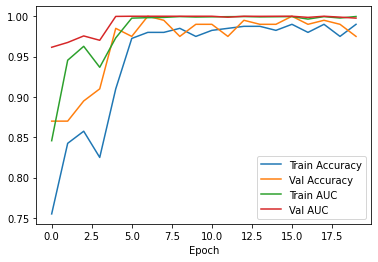

In [46]:
import time

last_epoch = 0

H = model.fit(X_train_transform, Y_train, initial_epoch=last_epoch,
              batch_size=32,
              epochs=20,
              validation_data=(X_test_transform, Y_test),
              shuffle=True)

print("Best Train Accuracy:", max(H.history['accuracy']))
print("Best Val Accuracy:", max(H.history['val_accuracy']))
print("Best Train AUC:", max(H.history['auc']))
print("Best Val AUC", max(H.history['val_auc']))

plt.plot(H.history['accuracy'], label='Train Accuracy')
plt.plot(H.history['val_accuracy'], label='Val Accuracy')
plt.plot(H.history['auc'], label='Train AUC')
plt.plot(H.history['val_auc'], label='Val AUC')

plt.xlabel('Epoch')

plt.legend()
plt.show()


### 4.2.3 Multi-Qubit Case (Two Outputs)

#### Build the Model

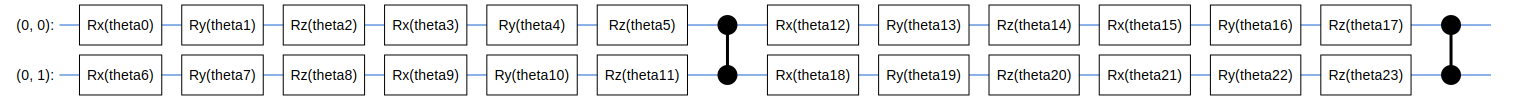

In [53]:
n_qubits = 2

# Construct the observable
qubits = cirq.GridQubit.rect(1, n_qubits)
Z_0 = cirq.PauliString(cirq.Z(qubits[0]))
I_0 = cirq.PauliString(cirq.I(qubits[0]))
Z_1 = cirq.PauliString(cirq.Z(qubits[1]))
I_1 = cirq.PauliString(cirq.I(qubits[1]))
observables = [0.5*Z_0 + 0.5*I_0, -0.5*Z_1 + 0.5*I_1]  # equivalent to |0⟩⟨0|⊗|1⟩⟨1|

# Initialize the PQC
PQC = ReUploadingPQC(n_qubits, 2, n_pca, use_entanglement=True, use_terminal_entanglement=True, observables=observables)

# Construct the model
input_tensor = tf.keras.Input(shape=(n_pca,), dtype=tf.dtypes.float32, name='input')
quantum_classifier = PQC(input_tensor)
model = tf.keras.Model(inputs=[input_tensor], outputs=quantum_classifier)

# Optimizer
opt_adam = tf.keras.optimizers.Adam(lr=0.1)

model.compile(loss='mse',
              optimizer=opt_adam,
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

SVGCircuit(PQC.circuit)

In [54]:
model.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 6)]               0         
_________________________________________________________________
re-uploading_PQC (ReUploadin (None, 2)                 48        
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


#### Train the Model

Epoch 1/20
13/13 [==============================] - 1s 56ms/step - loss: 0.2953 - accuracy: 0.5535 - auc: 0.5456 - val_loss: 0.1855 - val_accuracy: 0.8100 - val_auc: 0.8008
Epoch 2/20
13/13 [==============================] - 0s 33ms/step - loss: 0.1740 - accuracy: 0.8009 - auc: 0.8198 - val_loss: 0.1013 - val_accuracy: 0.9150 - val_auc: 0.9388
Epoch 3/20
13/13 [==============================] - 0s 35ms/step - loss: 0.0857 - accuracy: 0.9264 - auc: 0.9625 - val_loss: 0.0875 - val_accuracy: 0.9650 - val_auc: 0.9513
Epoch 4/20
13/13 [==============================] - 0s 33ms/step - loss: 0.0621 - accuracy: 0.9586 - auc: 0.9804 - val_loss: 0.0425 - val_accuracy: 0.9700 - val_auc: 0.9950
Epoch 5/20
13/13 [==============================] - 0s 34ms/step - loss: 0.0494 - accuracy: 0.9654 - auc: 0.9850 - val_loss: 0.0506 - val_accuracy: 0.9700 - val_auc: 0.9890
Epoch 6/20
13/13 [==============================] - 0s 35ms/step - loss: 0.0458 - accuracy: 0.9672 - auc: 0.9888 - val_loss: 0.0294 - v

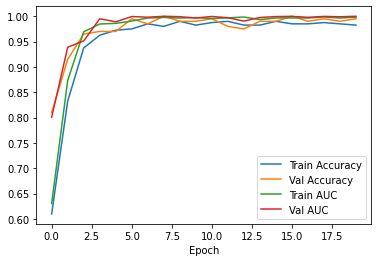

In [55]:
import time

last_epoch = 0

H = model.fit(X_train_transform, tf.keras.utils.to_categorical(Y_train), initial_epoch=last_epoch,
              batch_size=32,
              epochs=20,
              validation_data=(X_test_transform, tf.keras.utils.to_categorical(Y_test)),
              shuffle=True)

print("Best Train Accuracy:", max(H.history['accuracy']))
print("Best Val Accuracy:", max(H.history['val_accuracy']))
print("Best Train AUC:", max(H.history['auc']))
print("Best Val AUC", max(H.history['val_auc']))

plt.plot(H.history['accuracy'], label='Train Accuracy')
plt.plot(H.history['val_accuracy'], label='Val Accuracy')
plt.plot(H.history['auc'], label='Train AUC')
plt.plot(H.history['val_auc'], label='Val AUC')

plt.xlabel('Epoch')

plt.legend()
plt.show()


## 4.3 Example 2: A classifier consists of more than one Data Re-uploading PQC (use more than one qubit since a PQC needs at least one qubit)

### 4.3.1 One Output Case

### 4.3.2 Two Outputs Case

#### Build the Model

In [25]:
# Construct the observable
n_qubits = 1
qubits = cirq.GridQubit.rect(1, n_qubits)
Z = cirq.PauliString(cirq.Z(qubits[-1]))
I = cirq.PauliString(cirq.I(qubits[-1]))
# Two observables, one for each PQC
observables_0 = [0.5*Z + 0.5*I]   # equivalent to |0⟩⟨0|
observables_1 = [-0.5*Z + 0.5*I]  # equivalent to |1⟩⟨1|

input_tensor = tf.keras.Input(shape=(n_pca,), dtype=tf.dtypes.float32, name='input')

PQC_1 = ReUploadingPQC(1, 1, n_pca, use_entanglement=False, use_terminal_entanglement=False, observables=observables_0, name='PQC_1')(input_tensor)
PQC_2 = ReUploadingPQC(1, 1, n_pca, use_entanglement=False, use_terminal_entanglement=False, observables=observables_1, name='PQC_2')(input_tensor)

output = tf.keras.layers.Concatenate()([PQC_1, PQC_2])

model = tf.keras.Model(inputs=[input_tensor], outputs=output)

# Optimizer
opt_adam = tf.keras.optimizers.Adam(lr=0.1)

model.compile(loss='cross_entropy',
              optimizer=opt_adam,
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

ValueError: ignored

#### Train the Model

In [47]:
import time

last_epoch = 0

H = model.fit(X_train_transform, Y_train, initial_epoch=last_epoch,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS,
              validation_data=(X_test_transform, Y_test),
              shuffle=True,
              callbacks=callbacks)


Epoch 1/100
Learning rate:  0.001
13/13 [==============================] - 1s 38ms/step - loss: 0.4920 - accuracy: 0.4771 - auc: 0.0972 - val_loss: 0.4661 - val_accuracy: 0.5000 - val_auc: 0.2562

Epoch 00001: saving model to /content/drive/My Drive/Projects/GSoC 2021/tutorials/Fully Quantum/01epoch.h5
Saved custom checkpoint for epoch 1.
Best acc, val acc, auc, val auc: [0.5325000286102295, 0.5699999928474426, 0.5320000052452087, 0.5]

Epoch 2/100
Learning rate:  0.001
13/13 [==============================] - 0s 14ms/step - loss: 0.4518 - accuracy: 0.4868 - auc: 0.2003 - val_loss: 0.4254 - val_accuracy: 0.5000 - val_auc: 0.4131

Epoch 00002: saving model to /content/drive/My Drive/Projects/GSoC 2021/tutorials/Fully Quantum/02epoch.h5
Saved custom checkpoint for epoch 2.
Best acc, val acc, auc, val auc: [0.5325000286102295, 0.5699999928474426, 0.5320000052452087, 0.5]

Epoch 3/100
Learning rate:  0.001
13/13 [==============================] - 0s 14ms/step - loss: 0.4206 - accuracy: 0.4

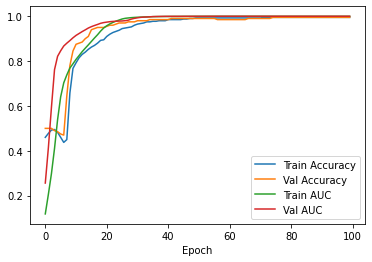

In [48]:
plt.plot(H.history['accuracy'], label='Train Accuracy')
plt.plot(H.history['val_accuracy'], label='Val Accuracy')
plt.plot(H.history['auc'], label='Train AUC')
plt.plot(H.history['val_auc'], label='Val AUC')

plt.xlabel('Epoch')

plt.legend()
plt.show()

# 5. Hybrid Quantum-Classical QCNN

## Build the Model

In [ ]:
import math

input_size = 7
filter_size = 3
stride = 2

print((1+(input_size-filter_size)/stride))
(math.ceil((1+(input_size-filter_size)/stride)) - 1)*stride + filter_size - input_size

3.0


0

In [72]:
input_tensor = tf.keras.Input(shape=(28, 28, 1), dtype=tf.dtypes.float32, name='input')

drc_settings = {
    "n_qubits": [1],
    "n_layers": [1],
    #"use_ent": [True, True],
    #"use_terminal_ent": [True, True]
}

qconv_1 = QConv2D_DRC(1, (3,3), (2,2), drc_settings, 1, padding="valid").call(input_tensor)
qconv_2 = QConv2D_DRC(1, (3,3), (2,2), drc_settings, 2, padding="valid").call(qconv_1)
pool = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="valid")(qconv_2)

flat = tf.keras.layers.Flatten()(pool)

classical_dense_1 = tf.keras.layers.Dense(2, activation='relu')(flat)
classical_dense_2 = tf.keras.layers.Dense(1, activation='sigmoid')(classical_dense_1)

model = tf.keras.Model(inputs=[input_tensor], outputs=classical_dense_2)

In [73]:
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
tf.compat.v1.pad_16 (TFOpLambda (None, 29, 29, 1)    0           input[0][0]                      
__________________________________________________________________________________________________
tf.__operators__.getitem_1940 ( (None, 29, 29)       0           tf.compat.v1.pad_16[0][0]        
__________________________________________________________________________________________________
tf.__operators__.getitem_1941 ( (None, 3, 3)         0           tf.__operators__.getitem_1940[0][
____________________________________________________________________________________________

In [ ]:
# Training parameters
BATCH_SIZE = 32
EPOCHS = 100

# Print parameters for sanity check
print("Batch size, epochs:", BATCH_SIZE, EPOCHS)

# Optimizer
opt_adam = tf.keras.optimizers.Adam(lr=lr_schedule(0))

model.compile(loss='categorical_crossentropy',
              optimizer=opt_adam,
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])


In [ ]:
checkpoint_dir = main_dir + '/Hybrid'

# initialize callback
cp_1 = CustomCallback(checkpoint_dir)
cp_2 = checkpoint_save_weights_only(checkpoint_dir)

callback_list = [cp_1, cp_2, lr_reducer, lr_scheduler]

## Train the Model

In [ ]:
import time

last_epoch = 0

H = model.fit(X_train, tf.keras.utils.to_categorical(Y_train), initial_epoch=last_epoch,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS,
              validation_data=(X_test, tf.keras.utils.to_categorical(Y_test)),
              shuffle=True,
              callbacks=)


Epoch 1/100
Learning rate:  0.001
13/13 [==============================] - 148s 4s/step - loss: 1.1194 - accuracy: 0.4821 - auc: 0.4640 - val_loss: 0.7983 - val_accuracy: 0.5000 - val_auc: 0.5000

Epoch 00001: saving model to /content/drive/MyDrive/Projects/GSoC 2021/Model_Hybrid/sandbox/01epoch.h5
Saved custom checkpoint for epoch 1.
Best acc, val acc, auc, val auc: [0.5, 0.5, 0.49699997901916504, 0.5]

Epoch 2/100
Learning rate:  0.001
13/13 [==============================] - 32s 3s/step - loss: 0.7908 - accuracy: 0.4650 - auc: 0.4411 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_auc: 0.5000

Epoch 00002: saving model to /content/drive/MyDrive/Projects/GSoC 2021/Model_Hybrid/sandbox/02epoch.h5
Saved custom checkpoint for epoch 2.
Best acc, val acc, auc, val auc: [0.5, 0.5, 0.49699997901916504, 0.5]

Epoch 3/100
Learning rate:  0.001
13/13 [==============================] - 33s 3s/step - loss: 0.6938 - accuracy: 0.5394 - auc: 0.5235 - val_loss: 0.6986 - val_accuracy: 0.5000 - val_au

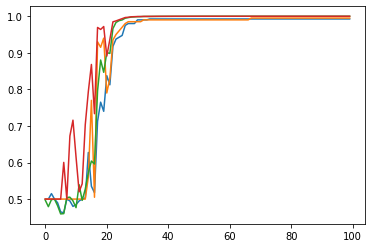

In [ ]:
plt.plot(H.history['accuracy'], label='Train Accuracy')
plt.plot(H.history['val_accuracy'], label='Val Accuracy')
plt.plot(H.history['auc'], label='Train AUC')
plt.plot(H.history['val_auc'], label='Val AUC')

plt.xlabel('Epoch')

plt.legend()
plt.show()

In [ ]:
#checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

# 6. Fully Quantum QCNN

## Build the Model

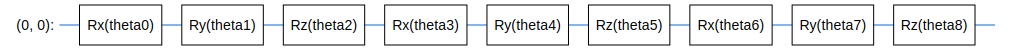

In [22]:
n_qubits = 2
qubits = cirq.GridQubit.rect(1, n_qubits)

Z_0 = cirq.PauliString(cirq.Z(qubits[0]))
I_0 = cirq.PauliString(cirq.I(qubits[0]))
Z_1 = cirq.PauliString(cirq.Z(qubits[1]))
I_1 = cirq.PauliString(cirq.I(qubits[1]))

gate_0 = 0.5*Z_0 + 0.5*I_0
gate_1 = -0.5*Z_1 + 0.5*I_1

observables = [gate_1]

PQC = ReUploadingPQC(1, 1, 9, use_entanglement=False, use_terminal_entanglement=False, observables=observables)
SVGCircuit(PQC.circuit)

In [58]:
n_qubits = 1
qubits = cirq.GridQubit.rect(1, n_qubits)

Z_1 = cirq.PauliString(cirq.Z(qubits[0]))
I_1 = cirq.PauliString(cirq.I(qubits[0]))

gate_1 = -0.5*Z_1 + 0.5*I_1

observables = [gate_1]

In [59]:
input_tensor = tf.keras.Input(shape=(28, 28, 1), dtype=tf.dtypes.float32, name='input')

drc_settings = {
    "n_qubits": [1],
    "n_layers": [1],
    #"use_ent": [True, True],
    #"use_terminal_ent": [True, True]
}

qconv_1 = QConv2D_DRC(1, (3,3), (2,2), drc_settings, 1, padding="valid").call(input_tensor)
qconv_2 = QConv2D_DRC(1, (3,3), (2,2), drc_settings, 2, padding="valid").call(qconv_1)
pool = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="valid")(qconv_2)

flat = tf.keras.layers.Flatten()(pool)

#quantum_classifier_1 = ReUploadingPQC(1, 1, flat.shape[-1], use_entanglement=True, use_terminal_entanglement=True, name='re-uploading_PQC_1')(flat)
#quantum_classifier_2 = ReUploadingPQC(1, 1, flat.shape[-1], use_entanglement=True, use_terminal_entanglement=True, name='re-uploading_PQC_2')(flat)

#output = tf.keras.layers.Concatenate()([quantum_classifier_1, quantum_classifier_2])
#output = tf.math.multiply(tf.math.add(output, tf.ones(shape=(1,2))), 0.5)
#output = tf.clip_by_value(output, clip_value_min=0, clip_value_max=1)

quantum_classifier = ReUploadingPQC(1, 1, flat.shape[-1], use_entanglement=False, use_terminal_entanglement=False, observables=observables)(flat)

model = tf.keras.Model(inputs=[input_tensor], outputs=quantum_classifier)

In [60]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
tf.compat.v1.pad_8 (TFOpLambda) (None, 29, 29, 1)    0           input[0][0]                      
__________________________________________________________________________________________________
tf.__operators__.getitem_988 (S (None, 29, 29)       0           tf.compat.v1.pad_8[0][0]         
__________________________________________________________________________________________________
tf.__operators__.getitem_989 (S (None, 3, 3)         0           tf.__operators__.getitem_988[0][0
____________________________________________________________________________________________

In [61]:
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

# Training parameters
BATCH_SIZE = 32
EPOCHS = 100

# Print parameters for sanity check
print("Batch size, epochs:", BATCH_SIZE, EPOCHS)

# Optimizer
#opt_adam = tf.keras.optimizers.Adam(lr=lr_schedule(0))
opt_adam = tf.keras.optimizers.Adam(lr=0.1)

model.compile(loss='mse',
              optimizer=opt_adam,
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

Batch size, epochs: 32 100


In [62]:
checkpoint_dir = main_dir + '/Fully Quantum'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=opt_adam,
                                 model=model)

class CustomCallback(tf.keras.callbacks.Callback):

    def __init__(self):
        super(CustomCallback, self).__init__()
        try:
            self.best_metric_list = list(np.loadtxt(checkpoint_dir + '/history_best_metric_list.txt'))
        except:
            # acc, val acc, auc, val auc
            self.best_metric_list = [0, 0, 0, 0]

        def load_history(name):
            try:
                data = np.loadtxt(checkpoint_dir + '/history_' + name + '.txt')
                return list(data)
                
            except:
                return []

        self.accuracy_list = load_history('accuracy')
        self.val_accuracy_list = load_history('val_accuracy')
        self.auc_list = load_history('auc')
        self.val_auc_list = load_history('val_auc')
        self.loss_list = load_history('loss')
        self.val_loss_list = load_history('val_loss')

    def on_epoch_end(self, epoch, logs=None):
        checkpoint.save(file_prefix = checkpoint_prefix)
        print("Saved custom checkpoint for epoch {}.".format(epoch+1))

        def save_list_to_txt(metric, metric_list, name):
            metric_list += [metric]
            np.savetxt(checkpoint_dir + '/history_' + name + '.txt', np.array(metric_list))
            return metric_list

        self.accuracy_list = save_list_to_txt(logs["accuracy"], self.accuracy_list, 'accuracy')
        self.val_accuracy_list = save_list_to_txt(logs["val_accuracy"], self.val_accuracy_list, 'val_accuracy')
        self.auc_list = save_list_to_txt(logs["auc"], self.auc_list, 'auc')
        self.val_auc_list = save_list_to_txt(logs["val_auc"], self.val_auc_list, 'val_auc')
        self.loss_list = save_list_to_txt(logs["loss"], self.loss_list, 'loss')
        self.val_loss_list = save_list_to_txt(logs["val_loss"], self.val_loss_list, 'val_loss')
        
        print_space = 0

        if logs["accuracy"] > self.best_metric_list[0]:
            self.best_metric_list[0] = logs["accuracy"]
        
        if logs["val_accuracy"] > self.best_metric_list[1]:
            self.best_metric_list[1] = logs["val_accuracy"]

        if logs["auc"] > self.best_metric_list[2]:
            self.best_metric_list[2] = logs["auc"]

        if logs["val_auc"] > self.best_metric_list[3]:
            self.best_metric_list[3] = logs["val_auc"]

        np.savetxt(checkpoint_dir + '/history_best_metric_list.txt', np.array(self.best_metric_list))
        print("Best acc, val acc, auc, val auc:", self.best_metric_list)
        print('')

In [63]:
# Prepare callbacks for model saving and for learning rate adjustment.
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

cp_filepath = main_dir + '/Fully Quantum/{epoch:02d}epoch.h5'
checkpoint_callback_epoch = tf.keras.callbacks.ModelCheckpoint(
    cp_filepath, monitor='val_loss', verbose=1, save_best_only=False,
    save_weights_only=True, mode='auto', save_freq='epoch'
)

#callbacks = [lr_reducer, lr_scheduler, checkpoint_callback_epoch, CustomCallback()]
callbacks = [checkpoint_callback_epoch, CustomCallback()]

## Train the Model

In [65]:
model(X_train[0:3])

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.00782233],
       [0.00782236],
       [0.00782228]], dtype=float32)>

In [66]:
import time

last_epoch = 0

H = model.fit(X_train, Y_train, initial_epoch=last_epoch,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS,
              validation_data=(X_test, Y_test),
              shuffle=True
              #callbacks=callbacks
              )


Epoch 1/100
13/13 [==============================] - 114s 3s/step - loss: 0.3163 - accuracy: 0.5428 - auc: 0.5254 - val_loss: 0.2497 - val_accuracy: 0.5000 - val_auc: 0.9700
Epoch 2/100
13/13 [==============================] - 24s 2s/step - loss: 0.2388 - accuracy: 0.5592 - auc: 0.7067 - val_loss: 0.0598 - val_accuracy: 0.9750 - val_auc: 0.9998
Epoch 3/100
13/13 [==============================] - 24s 2s/step - loss: 0.0375 - accuracy: 0.9746 - auc: 0.9881 - val_loss: 0.0112 - val_accuracy: 0.9900 - val_auc: 0.9962
Epoch 4/100
13/13 [==============================] - 25s 2s/step - loss: 0.0100 - accuracy: 0.9973 - auc: 0.9987 - val_loss: 0.0050 - val_accuracy: 0.9950 - val_auc: 1.0000
Epoch 5/100
13/13 [==============================] - 24s 2s/step - loss: 0.0053 - accuracy: 0.9955 - auc: 0.9995 - val_loss: 0.0037 - val_accuracy: 1.0000 - val_auc: 1.0000
Epoch 6/100
13/13 [==============================] - 25s 2s/step - loss: 0.0053 - accuracy: 0.9896 - auc: 0.9999 - val_loss: 0.0047 - 

KeyboardInterrupt: ignored